In [1]:
import torch
from pathlib import Path
from PIL import Image

In [2]:
data_path = Path("ECG/")
Image_Path = data_path / "ECG_Image_data"

In [3]:
device = "cuda" if torch.cuda.is_available() == True else "cpu"

In [4]:
device

'cuda'

In [5]:
Image_Path

WindowsPath('ECG/ECG_Image_data')

In [6]:
train_dir = Image_Path / "train"
test_dir = Image_Path / "test"

In [7]:
train_dir,test_dir

(WindowsPath('ECG/ECG_Image_data/train'),
 WindowsPath('ECG/ECG_Image_data/test'))

In [8]:
import random

Image_Path_list = list(Image_Path.glob("*/*/*.png"))

In [9]:
Image_Path_list[:10]

[WindowsPath('ECG/ECG_Image_data/test/F/F0.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F104.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F113.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F115.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F118.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F12.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F123.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F132.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F135.png'),
 WindowsPath('ECG/ECG_Image_data/test/F/F137.png')]

In [10]:
len(Image_Path_list)

123998

Image height: 288
Image width: 432
Image class: F


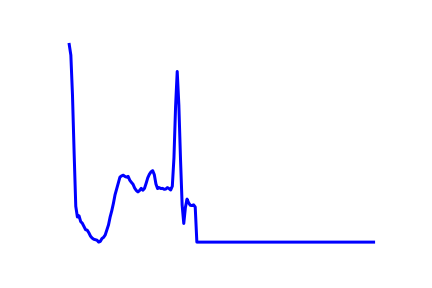

In [11]:
img = Image.open(Image_Path_list[5])
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
print(f"Image class: {Image_Path_list[5].parent.stem}")
img

### Loading it into the DataLoader and and transforming it into tensor using `torchvision`

In [12]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets

In [13]:
data_transformer = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [14]:
from matplotlib import pyplot as plt

In [15]:
def Comparator101(image_path, transformer,n=4):
    
    random_image_paths = random.sample(image_path,k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Image: {f.size}")
            ax[0].axis(False)

            transformed_image = transformer(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed Image: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class : {image_path.parent.stem}")



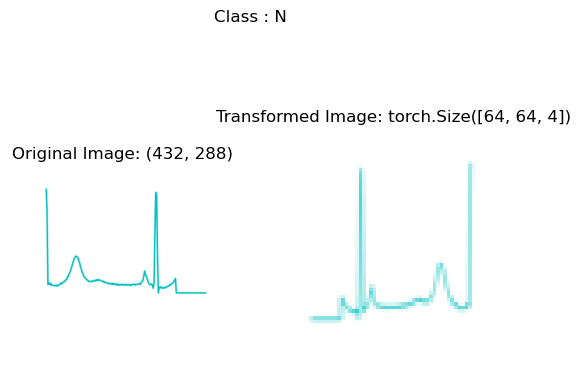

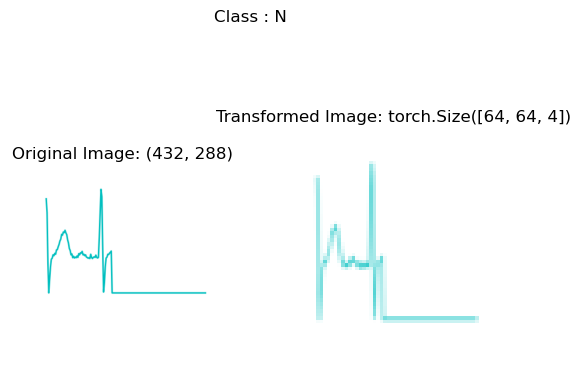

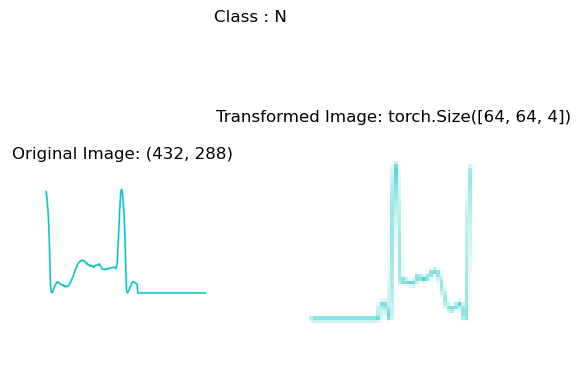

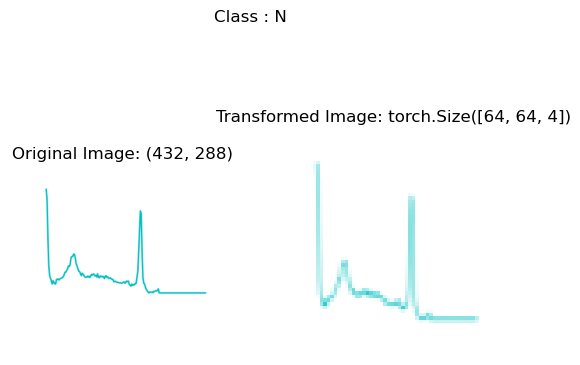

In [16]:
Comparator101(image_path=Image_Path_list,transformer=data_transformer,n=4)

## Creating the Dataset and DataLoader

In [17]:
from torch.utils.data import DataLoader
from torchvision import datasets

In [18]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transformer,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transformer,
                                 target_transform=None)

In [19]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 99199
     Root location: ECG\ECG_Image_data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 24799
     Root location: ECG\ECG_Image_data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
labels = train_data.classes

In [21]:
labels

['F', 'M', 'N', 'Q', 'S', 'V']

In [22]:
labels_as_dict = train_data.class_to_idx

In [23]:
labels_as_dict

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

In [24]:
sample_image,clas = train_data[9][0],train_data[9][1]
sample_image,clas

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 0)

In [25]:
labels[clas]

'F'

In [26]:
import os


In [27]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=True,
                             num_workers=os.cpu_count())

In [28]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1aa543daf50>,
 <torch.utils.data.dataloader.DataLoader at 0x1aa5ffd5a50>)

In [29]:
img,label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}")
print(f"Label shape : {label.shape}")

Image Shape: torch.Size([32, 3, 64, 64])
Label shape : torch.Size([32])


### Replicating the TinyVGG Architecture

In [30]:
from torch import nn

In [31]:
class TinyVGG(nn.Module):
    def __init__(self,inPut:int, hidden: int, outPut: int):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=inPut,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.MaxPool2d(stride=2,kernel_size=3)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*841,
                      out_features=outPut)
        )

    def forward(self,x : torch.tensor):
        x = self.block1(x)
        # print(f"shape after block 1 : {x.shape}")
        x = self.block2(x)
        # print(f"Shape after block 2 : {x.shape}")
        x = self.classifier(x)
        # print(f"Shape after classifeir layer : {x.shape}")

        return x

In [32]:
len(labels)

6

In [96]:
model_0 = TinyVGG(inPut=3, hidden=16, outPut=len(labels)).to(device)

In [97]:
model_0(img.to(device))

tensor([[ 0.0053,  0.0188,  0.0029, -0.0224,  0.0026, -0.0373],
        [ 0.0052,  0.0182,  0.0026, -0.0218,  0.0029, -0.0366],
        [ 0.0053,  0.0187,  0.0021, -0.0216,  0.0028, -0.0362],
        [ 0.0058,  0.0185,  0.0033, -0.0199,  0.0044, -0.0380],
        [ 0.0049,  0.0188,  0.0015, -0.0224,  0.0022, -0.0363],
        [ 0.0055,  0.0181,  0.0026, -0.0224,  0.0027, -0.0369],
        [ 0.0050,  0.0189,  0.0026, -0.0224,  0.0022, -0.0363],
        [ 0.0044,  0.0181,  0.0021, -0.0224,  0.0031, -0.0360],
        [ 0.0057,  0.0186,  0.0027, -0.0221,  0.0024, -0.0361],
        [ 0.0050,  0.0190,  0.0026, -0.0222,  0.0027, -0.0359],
        [ 0.0050,  0.0187,  0.0017, -0.0223,  0.0033, -0.0366],
        [ 0.0054,  0.0187,  0.0021, -0.0220,  0.0020, -0.0364],
        [ 0.0053,  0.0194,  0.0011, -0.0218,  0.0041, -0.0377],
        [ 0.0057,  0.0183,  0.0019, -0.0224,  0.0027, -0.0363],
        [ 0.0050,  0.0182,  0.0024, -0.0224,  0.0023, -0.0367],
        [ 0.0049,  0.0181,  0.0021, -0.0

In [39]:
def train_step(model: torch.nn.Module, 
               dataloader: DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               ):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [40]:
def test_step(model: torch.nn.Module, 
              dataloader: DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [41]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [43]:
model = TinyVGG(inPut=3,hidden=16,outPut=len(labels)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

model_results = train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,
                      loss_fn=loss_fn,
                      optimizer=optimizer,
                      epochs=3)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0915 | train_acc: 0.9748 | test_loss: 0.0458 | test_acc: 0.9877
Epoch: 2 | train_loss: 0.0065 | train_acc: 0.9982 | test_loss: 0.0094 | test_acc: 0.9977
Epoch: 3 | train_loss: 0.0189 | train_acc: 0.9949 | test_loss: 0.0028 | test_acc: 0.9998


In [45]:
labels_as_dict

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

In [134]:
from typing import List,Dict

In [174]:
def pred_and_plot(image_path: str,
                  model: torch.nn.Module,
                  class_names: List[str] ):
    
    import torchvision
    from matplotlib import pyplot as plt

    transformer = transforms.Compose([
        transforms.Resize(size=(64,64))
    ])

    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255
    # plt.imshow(target_image.permute(1,2,0))
    # print(f"Target shape : {target_image.shape}")

    transformed_image = transformer(target_image)
    # print(f"Transformed shape: {transformed_image.shape}")

    device = "cuda" if torch.cuda.is_available() == True else "cpu"

    model.to(device)

    with torch.inference_mode():
        
        model.eval()

        transformed_image = transformed_image.unsqueeze(0)

        logits = model(transformed_image.to(device))

        logits_prob = torch.softmax(logits,dim=1)

        target_label = torch.argmax(logits_prob,dim=1)

        plt.imshow(target_image.permute(1,2,0))
        plt.axis(False)
        plt.title(f"I think that the given image is : {class_names[int(target_label)]}")


In [182]:
from pathlib import Path
custom_paht = Path("Q31.jpg")

In [183]:
custom_paht

WindowsPath('Q31.jpg')

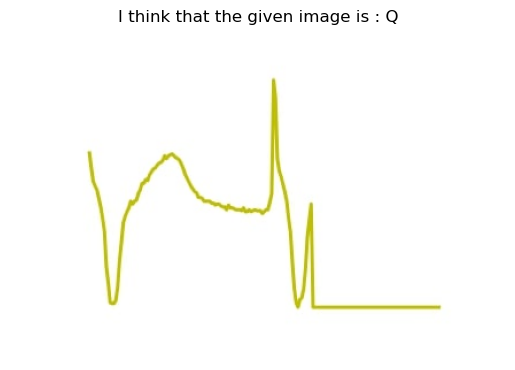

In [184]:
pred_and_plot(model=model,
              class_names=labels,
              image_path=custom_paht,
              )